# Sentiment Analysis

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [48]:
data = pd.read_csv("Reviews.csv")

In [49]:
data.head(7)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...


In [50]:
plt.style.use('ggplot')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


Text(0.5, 0, 'score')

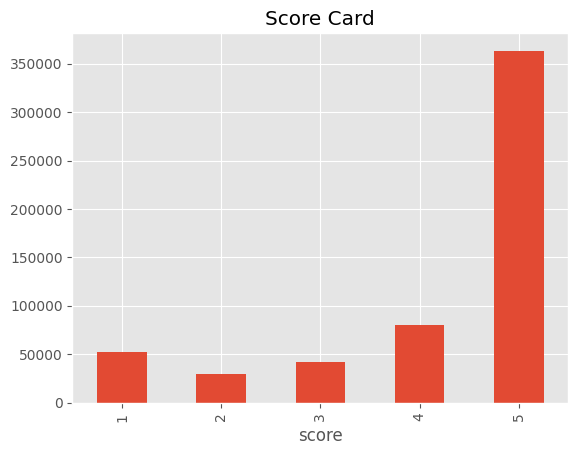

In [52]:
b=data["Score"].value_counts().sort_index().plot(kind="bar",title ="Score Card")
b.set_xlabel("score")



# Basic NLTK

In [53]:
import nltk 


In [54]:
example = data["Text"][9]
example

'This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.'

In [55]:
token1 = nltk.word_tokenize(example)
token1[0:5]


['This', 'is', 'a', 'very', 'healthy']

In [56]:
tagged=nltk.pos_tag(token1)
tagged


[('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('very', 'RB'),
 ('healthy', 'JJ'),
 ('dog', 'NN'),
 ('food', 'NN'),
 ('.', '.'),
 ('Good', 'NNP'),
 ('for', 'IN'),
 ('their', 'PRP$'),
 ('digestion', 'NN'),
 ('.', '.'),
 ('Also', 'RB'),
 ('good', 'JJ'),
 ('for', 'IN'),
 ('small', 'JJ'),
 ('puppies', 'NNS'),
 ('.', '.'),
 ('My', 'PRP$'),
 ('dog', 'NN'),
 ('eats', 'VBZ'),
 ('her', 'PRP$'),
 ('required', 'JJ'),
 ('amount', 'NN'),
 ('at', 'IN'),
 ('every', 'DT'),
 ('feeding', 'NN'),
 ('.', '.')]

In [57]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  is/VBZ
  a/DT
  very/RB
  healthy/JJ
  dog/NN
  food/NN
  ./.
  (PERSON Good/NNP)
  for/IN
  their/PRP$
  digestion/NN
  ./.
  Also/RB
  good/JJ
  for/IN
  small/JJ
  puppies/NNS
  ./.
  My/PRP$
  dog/NN
  eats/VBZ
  her/PRP$
  required/JJ
  amount/NN
  at/IN
  every/DT
  feeding/NN
  ./.)


# VADER Seniment Scoring

In [58]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [59]:
sia.polarity_scores("I am not happy")

{'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.4585}

In [60]:
data=data.head(500)

In [61]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [62]:
from tqdm.notebook import tqdm
res={}
for i,row in tqdm(data.iterrows(), total =len(data)):
    text =row["Text"]
    myid =row["Id"]
    res[myid] =sia.polarity_scores(text)
    

  0%|          | 0/500 [00:00<?, ?it/s]

In [63]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [64]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={"index":'Id'})
vaders= vaders.merge(data, how='left')

In [65]:
vaders.head(5)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


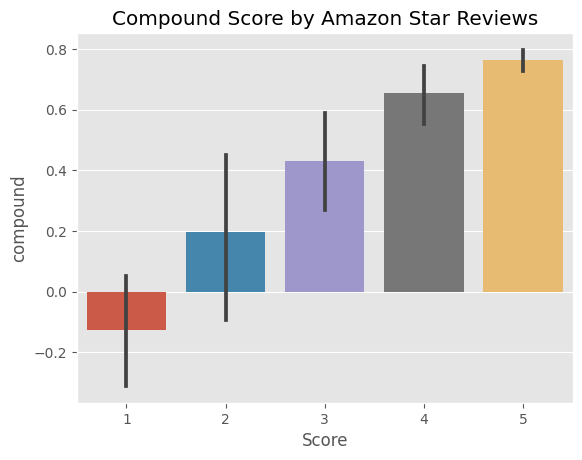

In [66]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
ax=sns.barplot(data=vaders,x='Score',y='compound')
ax.set_title('Compound Score by Amazon Star Reviews')
plt.show()

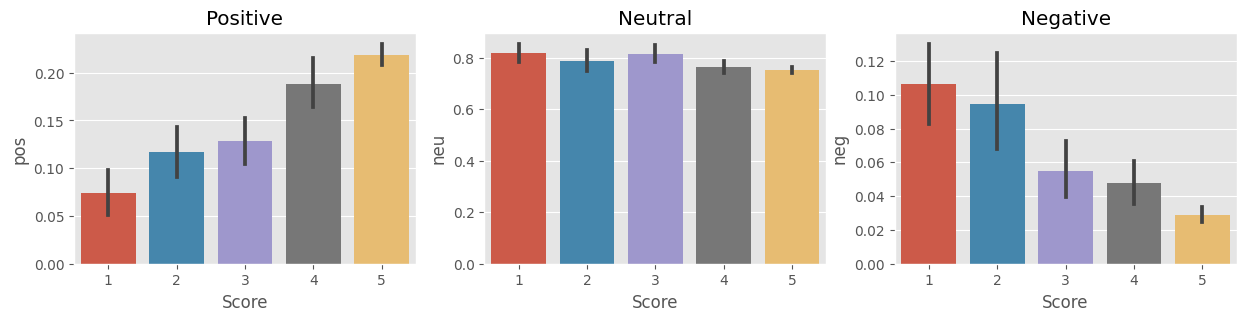

In [67]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
fig,axs = plt.subplots(1,3,figsize=(15,3))
sns.barplot(data=vaders,x="Score",y="pos",ax=axs[0])
sns.barplot(data=vaders,x="Score",y="neu",ax=axs[1])
sns.barplot(data=vaders,x="Score",y="neg",ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()



# Roberta Pretrained Model

In [68]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [69]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained (MODEL)
model = AutoModelForSequenceClassification.from_pretrained (MODEL)

In [70]:
print(example)
sia.polarity_scores(example)

This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.


{'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313}

In [71]:
encoded_text = tokenizer(example,return_tensors ='pt')
output=model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[-2.7215,  0.1698,  2.9929]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [72]:
scores=output[0][0].detach().numpy()
scores

array([-2.7214959 ,  0.16976902,  2.9929137 ], dtype=float32)

In [73]:
scores = softmax(scores)
scores

array([0.00310346, 0.05591216, 0.9409844 ], dtype=float32)

In [74]:
scores_dict = {
    'rob_neg':scores[0],
    'rob_neu':scores[1],
    'rob_pos':scores[2]
}
print(scores_dict)

{'rob_neg': 0.0031034572, 'rob_neu': 0.05591216, 'rob_pos': 0.9409844}


In [75]:
def polarity_scores_roberta (example):
    encoded_text = tokenizer (example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach (). numpy ( )
    scores = softmax(scores)
    scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
    }
    return scores_dict


In [76]:
res={}
for i,row in tqdm(data.iterrows(), total =len(data)):
    try:   
        text =row["Text"]
        myid =row["Id"]
        vader_result =sia.polarity_scores(text)
        vader_result_rename={}
        for key, value in vader_result.items():
            vader_result_rename [f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result,**roberta_result}
        res[myid]=both
    except RuntimeError:
        print(f'Broke for id{myid}')
        
    

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id83
Broke for id187


In [77]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename (columns={'index': 'Id'})
results_df = results_df.merge(data, how='left')

In [78]:
results_df.head(5)

,Id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


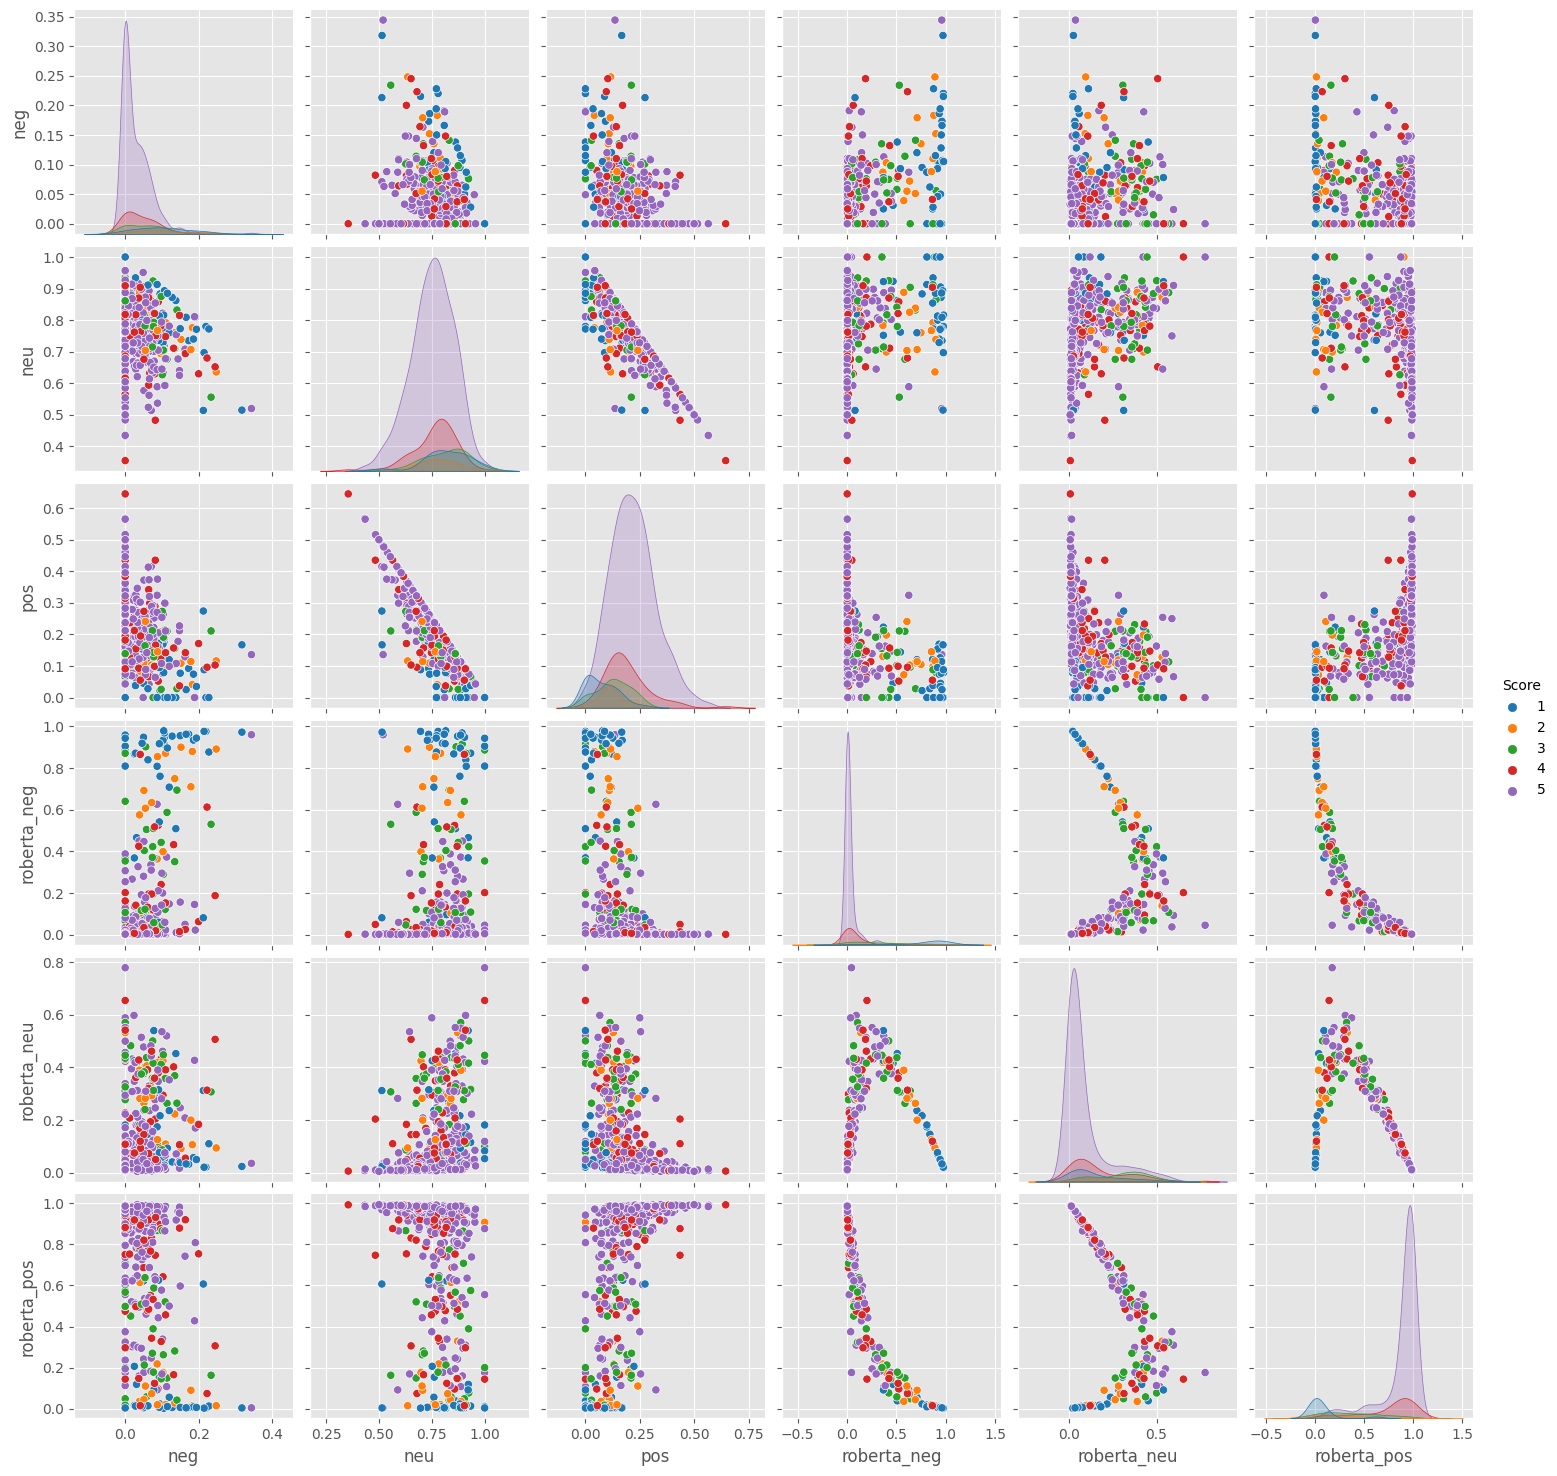

In [79]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.pairplot(data=results_df,
             vars=['neg', 'neu', 'pos','roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score', palette='tab10')
plt.show()


# Hugging Face Transformers


In [80]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")


In [81]:
sent_pipeline("i love to do sentiment analysis project")

[{'label': 'POSITIVE', 'score': 0.9995157718658447}]